# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statistics as st
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
import sklearn
from sklearn.preprocessing import MinMaxScaler
from scipy import spatial
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from pgmpy.estimators import HillClimbSearch
from sklearn import feature_selection as fs
import collections
import mdptoolbox, mdptoolbox.example
import argparse
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras import backend as k
from collections import deque
import gym
import warnings
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.evaluation import evaluate_policy
from stable_baselines.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise, AdaptiveParamNoiseSpec
from stable_baselines import DDPG

# Import the Dataset

In [2]:
data = pd.read_csv("ride.csv")
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
data.shape

(693071, 57)

In [4]:
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

##### Removing irrelevant features

In [5]:
data = data.drop(['id', 'timestamp','timezone', 'product_id', 'surge_multiplier'], axis = 1)

In [6]:
data_x = data.drop("price", axis = 1)
data_y = data.iloc[:,8]
data = pd.concat([data_x, data_y], axis = 1)

##### Sample from data associated with Uber

In [7]:
data = data[data["cab_type"] == "Uber"].reset_index().drop(["index", "cab_type"], axis = 1)

In [8]:
data.columns

Index(['hour', 'day', 'month', 'datetime', 'source', 'destination', 'name',
       'distance', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'price'],
      dtype='object')

# EDA

### Data Visualization

<AxesSubplot:xlabel='count', ylabel='icon'>

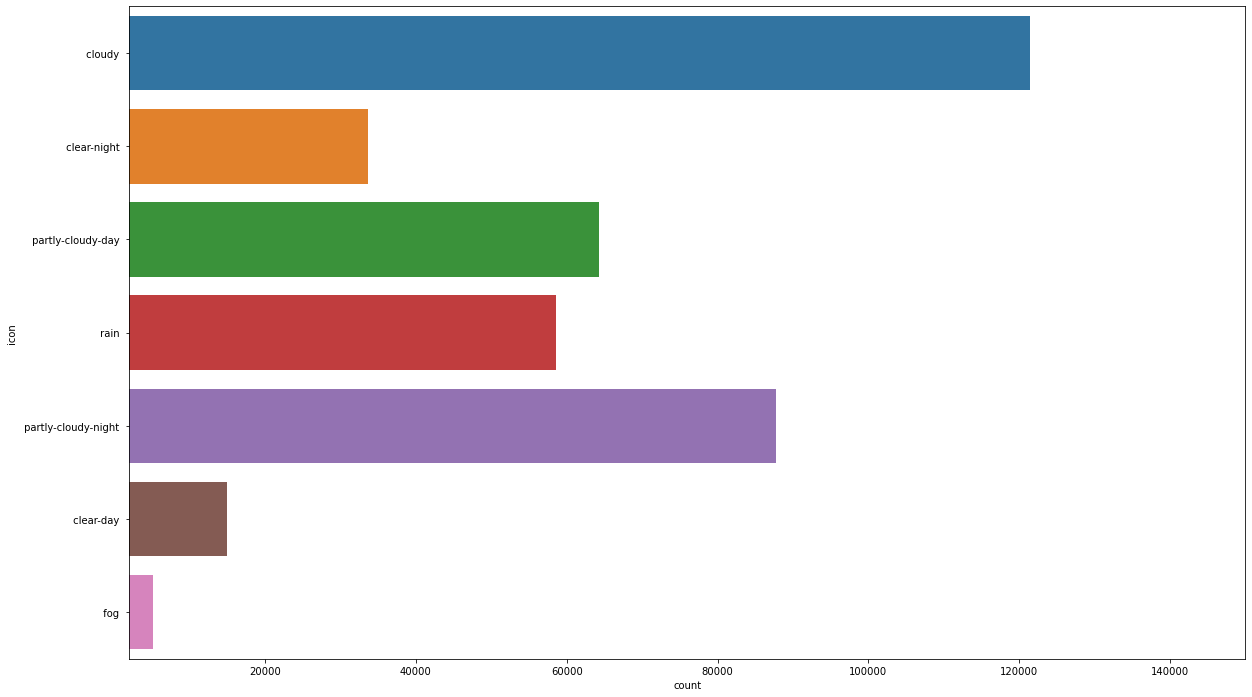

In [9]:
fig = plt.figure(figsize = (20,12))
plt.xlim(2000, 150000)
sns.countplot(y = "icon", data = data)

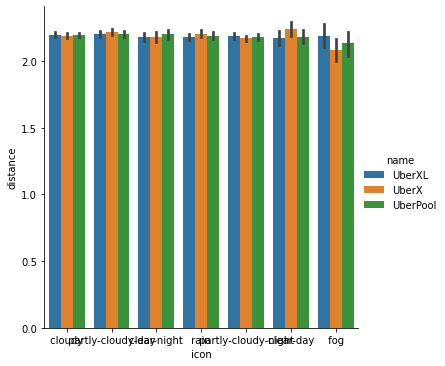

In [10]:
sns.catplot(x = "icon", y = "distance", hue = "name",kind = "bar", data = data[(data["name"] == "UberXL") | (data["name"] == "UberX") | (data["name"] == "UberPool")])

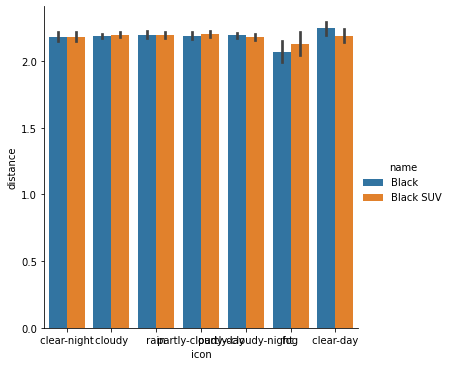

In [11]:
sns.catplot(x = "icon", y = "distance", hue = "name",kind = "bar", data = data[(data["name"] == "Black") | (data["name"] == "Black SUV")])

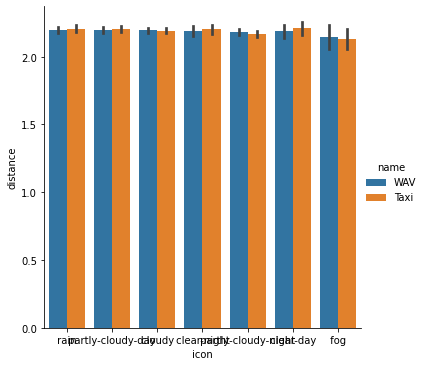

In [12]:
sns.catplot(x = "icon", y = "distance", hue = "name",kind = "bar", data = data[(data["name"] == "Taxi") | (data["name"] == "WAV")])

### Data manipulation

In [13]:
data[["name","distance","temperatureMin", "temperatureMax"]].groupby(["name"]).mean()

,distance,temperatureMin,temperatureMax
name,,,
Black,2.191399,33.451900,45.243680
Black SUV,2.191378,33.475143,45.275384
Taxi,2.191383,33.476342,45.277155
UberPool,2.191396,33.453702,45.253569
UberX,2.191390,33.423663,45.221049
UberXL,2.191378,33.426031,45.219920
WAV,2.191378,33.447161,45.237931


In [14]:
data[["name", 'precipProbability', 'precipIntensity']].groupby(["name"]).mean()

,precipProbability,precipIntensity
name,,
Black,0.148658,0.009139
Black SUV,0.147089,0.008988
Taxi,0.147634,0.009071
UberPool,0.146511,0.008881
UberX,0.146558,0.008895
UberXL,0.145548,0.008896
WAV,0.146176,0.008905


In [15]:
data[["name","month",'humidity', 'windSpeed', 'windGust']].groupby(["name", 'month']).mean()

humidity  windSpeed   windGust
name      month                                
Black     11     0.745498   7.467438  10.207559
          12     0.738597   5.306961   7.276161
Black SUV 11     0.744968   7.477981  10.221739
          12     0.739494   5.311679   7.301344
Taxi      11     0.745884   7.437383  10.169528
          12     0.739022   5.299795   7.265235
UberPool  11     0.743970   7.450539  10.181427
          12     0.739545   5.306338   7.273438
UberX     11     0.744837   7.436100  10.155595
          12     0.738536   5.338477   7.341719
UberXL    11     0.744898   7.436583  10.151311
          12     0.738563   5.296979   7.258975
WAV       11     0.744607   7.428919  10.159479
          12     0.738804   5.314374   7.277432

# Data Preparation

### Data Integration and Combining

##### Convert Datetime values into month, day, hour, and minute features

In [16]:
data['datetime_'] = pd.to_datetime(data.datetime, format='%Y-%m-%d %H:%M:%S')
data = data.drop("datetime", axis = 1)

In [17]:
data["minute"] = data["datetime_"].dt.minute

In [18]:
data_min = data.iloc[:,-1]
data_xx = data.iloc[:,:-2]
data = pd.concat([data_min, data_xx], axis = 1)

In [19]:
data.columns

Index(['minute', 'hour', 'day', 'month', 'source', 'destination', 'name',
       'distance', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'price'],
      dtype='object')

In [20]:
#apparentTemperatureMaxTime
list_of_atmaxt = []
for i in data.iloc[:,-2]:
    j = datetime.fromtimestamp(i).strftime('%d-%m-%y %H:%M')
    list_of_atmaxt.append(j)

#apparentTemperatureMinTime
list_of_atmint = []
for k in data.iloc[:,-4]:
    l = datetime.fromtimestamp(k).strftime('%d-%m-%y %H:%M')
    list_of_atmint.append(l)
    
#temperatureMaxTime  
list_of_tmaxt = []
for a in data.iloc[:,-6]:
    b = datetime.fromtimestamp(a).strftime('%d-%m-%y %H:%M')
    list_of_tmaxt.append(b)

#temperatureMinTime
list_of_tmint = []
for c in data.iloc[:,-8]:
    d = datetime.fromtimestamp(c).strftime('%d-%m-%y %H:%M')
    list_of_tmint.append(d)


#uvIndexTime
list_of_uvit = []
for e in data.iloc[:,-10]:
    f = datetime.fromtimestamp(e).strftime('%d-%m-%y %H:%M')
    list_of_uvit.append(f)



#sunsetTime
list_of_sst = []
for g in data.iloc[:,-13]:
    h = datetime.fromtimestamp(g).strftime('%d-%m-%y %H:%M')
    list_of_sst.append(h)


#sunriseTime
list_of_srt = []
for m in data.iloc[:,-14]:
    n = datetime.fromtimestamp(m).strftime('%d-%m-%y %H:%M')
    list_of_srt.append(n)


#apparentTemperatureLowTime
list_of_atlt = []
for o in data.iloc[:,-23]:
    p = datetime.fromtimestamp(o).strftime('%d-%m-%y %H:%M')
    list_of_atlt.append(p)

#apparentTemperatureHighTime
list_of_atht = []
for q in data.iloc[:,-25]:
    r = datetime.fromtimestamp(q).strftime('%d-%m-%y %H:%M')
    list_of_atht.append(r)


#temperatureLowTime
list_of_tlt = []
for s in data.iloc[:,-27]:
    t = datetime.fromtimestamp(s).strftime('%d-%m-%y %H:%M')
    list_of_tlt.append(t)


#temperatureHighTime
list_of_tht = []
for u in data.iloc[:,-29]:
    v = datetime.fromtimestamp(u).strftime('%d-%m-%y %H:%M')
    list_of_tht.append(v)

#windGustTime
list_of_wgt = []
for w in data.iloc[:,-32]:
    x = datetime.fromtimestamp(w).strftime('%d-%m-%y %H:%M')
    list_of_wgt.append(x)    
    
data_times = pd.DataFrame({"apparentTemperatureMaxTime" : list_of_atmaxt, 
                           "apparentTemperatureMinTime" : list_of_atmint,
                           "temperatureMaxTime" : list_of_tmaxt,
                           "temperatureMinTime" : list_of_tmint, 
                           "uvIndexTime" : list_of_uvit, 
                           "sunsetTime" : list_of_sst, 
                           "sunriseTime" : list_of_srt,
                           "apparentTemperatureLowTime" : list_of_atlt,
                           "apparentTemperatureHighTime" : list_of_atht, 
                           "temperatureLowTime" : list_of_tlt, 
                           "temperatureHighTime" : list_of_tht,
                           "windGustTime" : list_of_wgt})

data_xxx = data.drop(["apparentTemperatureMaxTime",
                      "apparentTemperatureMinTime",
                      "temperatureMaxTime", 
                      "temperatureMinTime", 
                      "uvIndexTime", 
                      "sunsetTime", 
                      "sunriseTime", 
                      "apparentTemperatureLowTime", 
                      "apparentTemperatureHighTime", 
                      "temperatureLowTime", 
                      "temperatureHighTime", 
                      "windGustTime"], axis = 1)

data1 = pd.concat([data_xxx, data_times], axis = 1)

In [21]:
data1['apparentTemperatureMaxTime_'] = pd.to_datetime(data1.apparentTemperatureMaxTime, format='%d-%m-%y %H:%M')

data1['apparentTemperatureMinTime_'] = pd.to_datetime(data1.apparentTemperatureMinTime, format='%d-%m-%y %H:%M')

data1['temperatureMaxTime_'] = pd.to_datetime(data1.temperatureMaxTime, format='%d-%m-%y %H:%M')

data1['temperatureMinTime_'] = pd.to_datetime(data1.temperatureMinTime, format='%d-%m-%y %H:%M')

data1['uvIndexTime_'] = pd.to_datetime(data1.uvIndexTime, format='%d-%m-%y %H:%M')

data1['sunsetTime_'] = pd.to_datetime(data1.sunsetTime, format='%d-%m-%y %H:%M')

data1['sunriseTime_'] = pd.to_datetime(data1.sunriseTime, format='%d-%m-%y %H:%M')

data1['apparentTemperatureLowTime_'] = pd.to_datetime(data1.apparentTemperatureLowTime, format='%d-%m-%y %H:%M')

data1['apparentTemperatureHighTime_'] = pd.to_datetime(data1.apparentTemperatureHighTime, format='%d-%m-%y %H:%M')

data1['temperatureLowTime_'] = pd.to_datetime(data1.temperatureLowTime, format='%d-%m-%y %H:%M')

data1['temperatureHighTime_'] = pd.to_datetime(data1.temperatureHighTime, format='%d-%m-%y %H:%M')

data1['windGustTime_'] = pd.to_datetime(data1.windGustTime, format='%d-%m-%y %H:%M')

In [22]:
data1["atmaxt_month"] = data1["apparentTemperatureMaxTime_"].dt.month

In [23]:
#apparentTemperatureMaxTime
data1["atmaxt_day"] = data1["apparentTemperatureMaxTime_"].dt.day
data1["atmaxt_hour"] = data1["apparentTemperatureMaxTime_"].dt.hour
data1["atmaxt_minute"] = data1["apparentTemperatureMaxTime_"].dt.minute

#apparentTemperatureMinTime
data1["atmint_month"] = data1["apparentTemperatureMinTime_"].dt.month
data1["atmint_day"] = data1["apparentTemperatureMinTime_"].dt.day
data1["atmint_hour"] = data1["apparentTemperatureMinTime_"].dt.hour
data1["atmint_minute"] = data1["apparentTemperatureMinTime_"].dt.minute

#temperatureMaxTime
data1["tmaxt_month"] = data1["temperatureMaxTime_"].dt.month
data1["tmaxt_day"] = data1["temperatureMaxTime_"].dt.day
data1["tmaxt_hour"] = data1["temperatureMaxTime_"].dt.hour
data1["tmaxt_minute"] = data1["temperatureMaxTime_"].dt.minute

#temperatureMinTime
data1["tmint_month"] = data1["temperatureMinTime_"].dt.month
data1["tmint_day"] = data1["temperatureMinTime_"].dt.day
data1["tmint_hour"] = data1["temperatureMinTime_"].dt.hour
data1["tmint_minute"] = data1["temperatureMinTime_"].dt.minute

#uvIndexTime
data1["uvit_month"] = data1["uvIndexTime_"].dt.month
data1["uvit_day"] = data1["uvIndexTime_"].dt.day
data1["uvit_hour"] = data1["uvIndexTime_"].dt.hour
data1["uvit_minute"] = data1["uvIndexTime_"].dt.minute

#sunsetTime
data1["sst_month"] = data1["sunsetTime_"].dt.month
data1["sst_day"] = data1["sunsetTime_"].dt.day
data1["sst_hour"] = data1["sunsetTime_"].dt.hour
data1["sst_minute"] = data1["sunsetTime_"].dt.minute

#sunriseTime
data1["srt_month"] = data1["sunriseTime_"].dt.month
data1["srt_day"] = data1["sunriseTime_"].dt.day
data1["srt_hour"] = data1["sunriseTime_"].dt.hour
data1["srt_minute"] = data1["sunriseTime_"].dt.minute

#apparentTemperatureLowTime
data1["atlt_month"] = data1["apparentTemperatureLowTime_"].dt.month
data1["atlt_day"] = data1["apparentTemperatureLowTime_"].dt.day
data1["atlt_hour"] = data1["apparentTemperatureLowTime_"].dt.hour
data1["atlt_minute"] = data1["apparentTemperatureLowTime_"].dt.minute

#apparentTemperatureHighTime
data1["atht_month"] = data1["apparentTemperatureHighTime_"].dt.month
data1["atht_day"] = data1["apparentTemperatureHighTime_"].dt.day
data1["atht_hour"] = data1["apparentTemperatureHighTime_"].dt.hour
data1["atht_minute"] = data1["apparentTemperatureHighTime_"].dt.minute

#temperatureLowTime
data1["tlt_month"] = data1["temperatureLowTime_"].dt.month
data1["tlt_day"] = data1["temperatureLowTime_"].dt.day
data1["tlt_hour"] = data1["temperatureLowTime_"].dt.hour
data1["tlt_minute"] = data1["temperatureLowTime_"].dt.minute

#temperatureHighTime
data1["tht_month"] = data1["temperatureHighTime_"].dt.month
data1["tht_day"] = data1["temperatureHighTime_"].dt.day
data1["tht_hour"] = data1["temperatureHighTime_"].dt.hour
data1["tht_minute"] = data1["temperatureHighTime_"].dt.minute

#WindGustTime
data1["wgt_month"] = data1["windGustTime_"].dt.month
data1["wgt_day"] = data1["windGustTime_"].dt.day
data1["wgt_hour"] = data1["windGustTime_"].dt.hour
data1["wgt_minute"] = data1["windGustTime_"].dt.minute


In [24]:
data1 = data1.drop(["apparentTemperatureMaxTime",
                      "apparentTemperatureMinTime",
                      "temperatureMaxTime", 
                      "temperatureMinTime", 
                      "uvIndexTime", 
                      "sunsetTime", 
                      "sunriseTime", 
                      "apparentTemperatureLowTime", 
                      "apparentTemperatureHighTime", 
                      "temperatureLowTime", 
                      "temperatureHighTime",
                      "apparentTemperatureMaxTime_",
                      "apparentTemperatureMinTime_",
                      "temperatureMaxTime_", 
                      "temperatureMinTime_", 
                      "uvIndexTime_", 
                      "sunsetTime_", 
                      "sunriseTime_", 
                      "apparentTemperatureLowTime_", 
                      "apparentTemperatureHighTime_", 
                      "temperatureLowTime_", 
                      "temperatureHighTime_", 
                      "windGustTime_"], axis = 1)

In [25]:
data1['temperatureMean'] = (data1['temperatureMax'] + data1['temperatureMin']) / 2

data1['apparentTemperatureMean'] = (data1['apparentTemperatureMax'] + data1['apparentTemperatureMin']) / 2

In [26]:
data1.columns

Index(['minute', 'hour', 'day', 'month', 'source', 'destination', 'name',
       'distance', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin',
       'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax',
       'price', 'windGustTime', 'atmaxt_month', 'atmaxt_day', 'atmaxt_hour',
       'atmaxt_minute', 'atmint_month', 'atmint_day', 'atmint_hour',
       'atmint_minute', 'tmaxt_month', 'tmaxt_day', 'tmaxt_hour',
       'tmaxt_minute', 'tmint_month', 'tmint_day', 'tmint_hour',
       'tmint_minute', 'uvit_month', 'uvit_day', 'uvit_hour', 'uvit_minute',
       

##### Convert Latitude and Longtitude to cartesian (x, y, z) Scale

In [27]:
# Define function of Converting lat/long to cartesian

def get_cartesian(lat,long):
    
    lat, long = np.deg2rad(lat), np.deg2rad(long)
    
    R = 6371           # radius of the earth
    
    x = R * np.cos(lat) * np.cos(long)
    y = R * np.cos(lat) * np.sin(long)
    z = R * np.sin(lat)
    
    return x,y,z

In [28]:
x,y,z = get_cartesian(data1.iloc[:,8].values,data1.iloc[:,9].values)

In [29]:
df_x = pd.DataFrame(x, columns = ["X"])
df_y = pd.DataFrame(y, columns = ["Y"])
df_z = pd.DataFrame(z, columns = ["Z"])

In [30]:
data1_xxxx = data1.drop(['latitude', 'longitude'], axis = 1)

In [31]:
data2 = pd.concat([data1_xxxx, df_x, df_y, df_z], axis = 1)

In [32]:
data2.columns

Index(['minute', 'hour', 'day', 'month', 'source', 'destination', 'name',
       'distance', 'temperature', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax', 'price', 'windGustTime', 'atmaxt_month',
       'atmaxt_day', 'atmaxt_hour', 'atmaxt_minute', 'atmint_month',
       'atmint_day', 'atmint_hour', 'atmint_minute', 'tmaxt_month',
       'tmaxt_day', 'tmaxt_hour', 'tmaxt_minute', 'tmint_month', 'tmint_day',
       'tmint_hour', 'tmint_minute', 'uvit_month', 'uvit_day', 'uvit_hour',
       'uvit_minute', 'sst_month', 'sst_day', 'sst_hou

In [33]:
data2.shape

(385663, 91)

In [34]:
data2.source.value_counts()

Financial District         32620
Theatre District           32283
Boston University          32144
North End                  32143
Northeastern University    32142
Back Bay                   32137
Fenway                     32137
South Station              32130
Haymarket Square           32122
West End                   32074
Beacon Hill                31939
North Station              31792
Name: source, dtype: int64

In [35]:
data2.destination.value_counts()

Financial District         32613
Theatre District           32262
Haymarket Square           32151
Boston University          32150
North End                  32142
Fenway                     32137
Northeastern University    32136
Back Bay                   32130
South Station              32129
West End                   32081
Beacon Hill                31939
North Station              31793
Name: destination, dtype: int64

In [36]:
data2.hour.value_counts(ascending = True)

8     13575
5     13853
7     13912
20    15067
19    15094
21    15252
6     15401
3     15591
4     15828
1     15879
2     16000
9     16023
22    16189
17    16531
12    16751
13    16881
18    16980
15    16989
11    17012
16    17035
10    17059
14    17078
0     17756
23    17927
Name: hour, dtype: int64

# MAKING SHIFTS

In [37]:
data2 = data2[(data2["hour"] != 11) & (data2["hour"] < 20) & (data2["hour"] >= 6)]

In [38]:
data2.hour.value_counts()

14    17078
10    17059
16    17035
15    16989
18    16980
13    16881
12    16751
17    16531
9     16023
6     15401
19    15094
7     13912
8     13575
Name: hour, dtype: int64

In [39]:
data2.columns

Index(['minute', 'hour', 'day', 'month', 'source', 'destination', 'name',
       'distance', 'temperature', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax', 'price', 'windGustTime', 'atmaxt_month',
       'atmaxt_day', 'atmaxt_hour', 'atmaxt_minute', 'atmint_month',
       'atmint_day', 'atmint_hour', 'atmint_minute', 'tmaxt_month',
       'tmaxt_day', 'tmaxt_hour', 'tmaxt_minute', 'tmint_month', 'tmint_day',
       'tmint_hour', 'tmint_minute', 'uvit_month', 'uvit_day', 'uvit_hour',
       'uvit_minute', 'sst_month', 'sst_day', 'sst_hou

In [40]:
shifts = [6, 10, 12, 14, 15, 19]

morning_trips = data2[(data2['hour'] >= shifts[0]) &
                               (data2['hour'] < shifts[1])]
noon_trips = data2[(data2['hour'] >= shifts[2]) &
                           (data2['hour'] < shifts[3])]
afterrnoon_trips = data2[(data2['hour'] >= shifts[4]) &
                             (data2['hour'] < shifts[5])]

data3 = pd.concat([morning_trips, noon_trips, afterrnoon_trips], axis = 0).reset_index().drop("index", axis = 1)


data4 = data3.assign(time_cat_rush = pd.cut(data3["hour"], bins = [6,11,15,20], labels = ["morning", "noon", "afternoon"]))

In [41]:
data4["time_cat_rush"] = data4["time_cat_rush"].astype("object")

In [42]:
data4.shape

(160078, 92)

### Handle Categorical Data

In [43]:
data4.iloc[:,0:51].dtypes

minute                       int64
hour                         int64
day                          int64
month                        int64
source                      object
destination                 object
name                        object
distance                   float64
temperature                float64
apparentTemperature        float64
short_summary               object
long_summary                object
precipIntensity            float64
precipProbability          float64
humidity                   float64
windSpeed                  float64
windGust                   float64
visibility                 float64
temperatureHigh            float64
temperatureLow             float64
apparentTemperatureHigh    float64
apparentTemperatureLow     float64
icon                        object
dewPoint                   float64
pressure                   float64
windBearing                  int64
cloudCover                 float64
uvIndex                      int64
visibility.1        

In [44]:
data4.iloc[:,51:92].dtypes

tmint_day                    int64
tmint_hour                   int64
tmint_minute                 int64
uvit_month                   int64
uvit_day                     int64
uvit_hour                    int64
uvit_minute                  int64
sst_month                    int64
sst_day                      int64
sst_hour                     int64
sst_minute                   int64
srt_month                    int64
srt_day                      int64
srt_hour                     int64
srt_minute                   int64
atlt_month                   int64
atlt_day                     int64
atlt_hour                    int64
atlt_minute                  int64
atht_month                   int64
atht_day                     int64
atht_hour                    int64
atht_minute                  int64
tlt_month                    int64
tlt_day                      int64
tlt_hour                     int64
tlt_minute                   int64
tht_month                    int64
tht_day             

In [45]:
data5_1 = data4.drop(["source", "destination", "short_summary", "long_summary", "windGustTime"], axis = 1)
data5 = pd.get_dummies(data5_1)

### Handle Missing Values

In [46]:
data5.iloc[:,0:51].isnull().sum()

minute                         0
hour                           0
day                            0
month                          0
distance                       0
temperature                    0
apparentTemperature            0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
visibility                     0
temperatureHigh                0
temperatureLow                 0
apparentTemperatureHigh        0
apparentTemperatureLow         0
dewPoint                       0
pressure                       0
windBearing                    0
cloudCover                     0
uvIndex                        0
visibility.1                   0
ozone                          0
moonPhase                      0
precipIntensityMax             0
temperatureMin                 0
temperatureMax                 0
apparentTemperatureMin         0
apparentTemperatureMax         0
price     

In [47]:
data5.iloc[:,51:].isnull().sum()

sst_month                     0
sst_day                       0
sst_hour                      0
sst_minute                    0
srt_month                     0
srt_day                       0
srt_hour                      0
srt_minute                    0
atlt_month                    0
atlt_day                      0
atlt_hour                     0
atlt_minute                   0
atht_month                    0
atht_day                      0
atht_hour                     0
atht_minute                   0
tlt_month                     0
tlt_day                       0
tlt_hour                      0
tlt_minute                    0
tht_month                     0
tht_day                       0
tht_hour                      0
tht_minute                    0
wgt_month                     0
wgt_day                       0
wgt_hour                      0
wgt_minute                    0
temperatureMean               0
apparentTemperatureMean       0
X                             0
Y       

In [48]:
data6 = data5.dropna().reset_index().drop(["index", "visibility.1"], axis = 1)

### Handle Outliers

<AxesSubplot:>

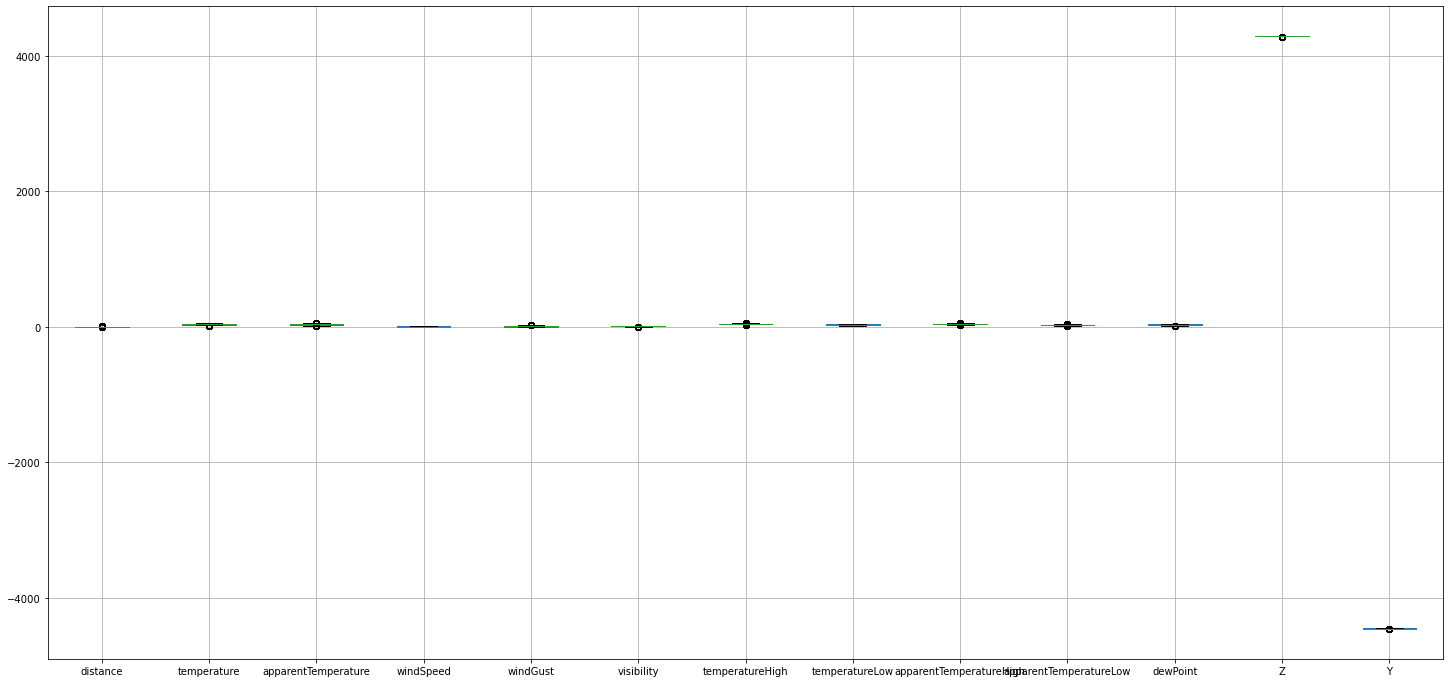

In [49]:
fig = plt.figure(figsize = (25,12))
data6.iloc[:,[4,5,6,10,11,12,13,14,15,16,17,-18,-19]].boxplot()

<AxesSubplot:>

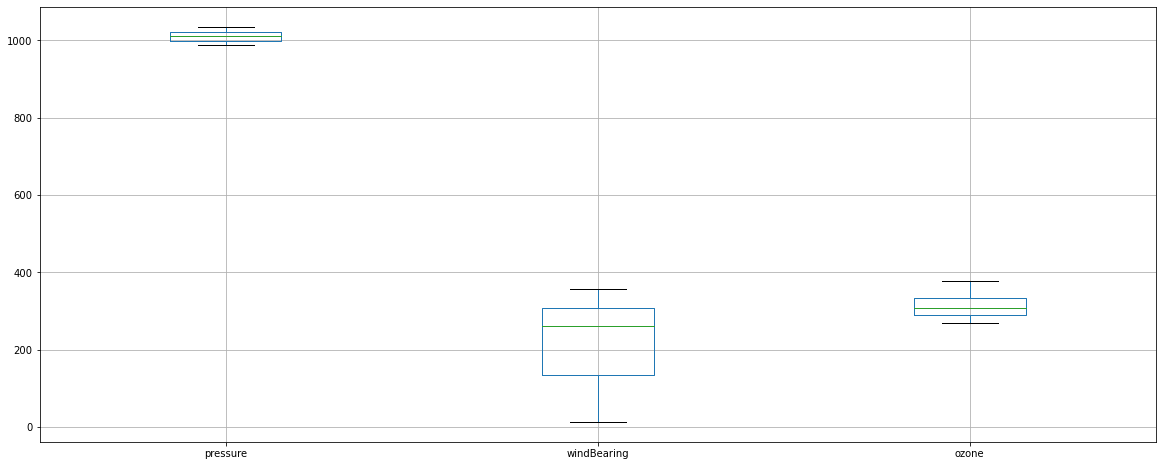

In [50]:
fig = plt.figure(figsize = (20,8))
data6.iloc[:,[18,19,22]].boxplot()

<AxesSubplot:>

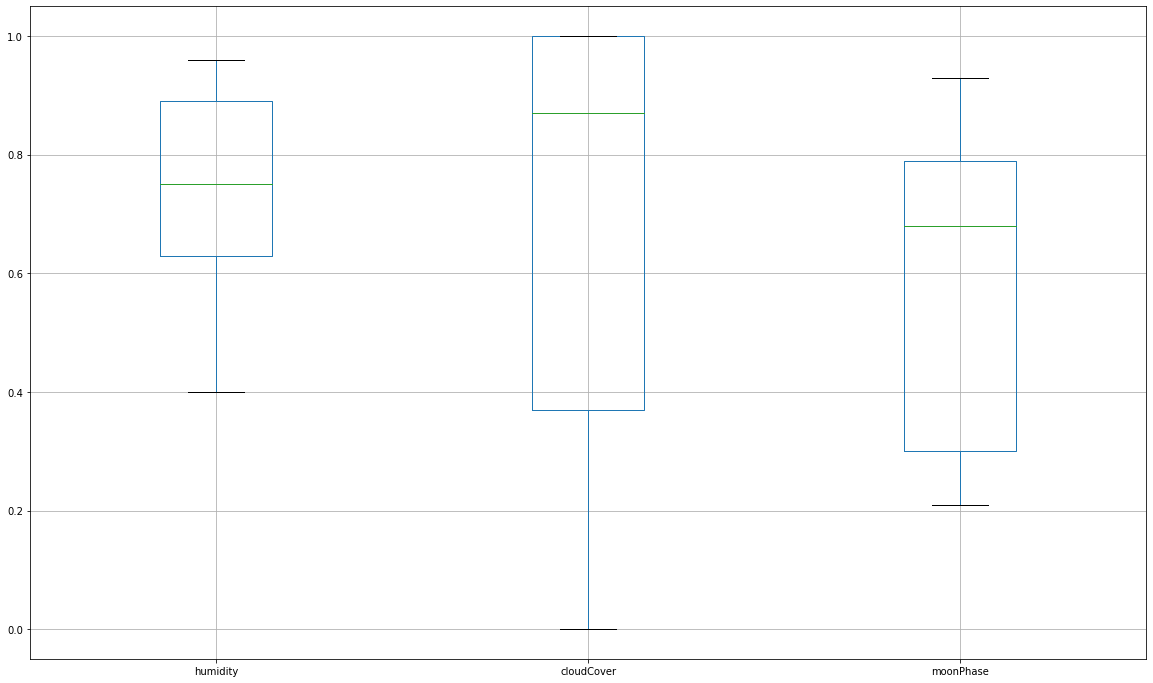

In [51]:
fig = plt.figure(figsize = (20,12))
data6.iloc[:,[9,20,23]].boxplot()

<AxesSubplot:>

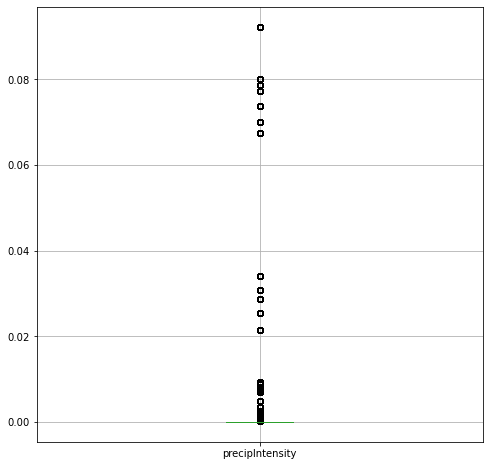

In [52]:
fig = plt.figure(figsize = (8,8))
data6.iloc[:,[7]].boxplot()

### Handle Duplicate Data

In [53]:
data6.duplicated().sum()

1375

In [54]:
data7 = data6.drop_duplicates().reset_index().drop("index", axis = 1)

In [55]:
data7.shape

(135836, 100)

In [56]:
data7_1 = data7.drop("price", axis = 1)
data7_2 = data7.iloc[:,29]
data8 = pd.concat([data7_1, data7_2], axis = 1)

In [57]:
data8.columns

Index(['minute', 'hour', 'day', 'month', 'distance', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax', 'atmaxt_month',
       'atmaxt_day', 'atmaxt_hour', 'atmaxt_minute', 'atmint_month',
       'atmint_day', 'atmint_hour', 'atmint_minute', 'tmaxt_month',
       'tmaxt_day', 'tmaxt_hour', 'tmaxt_minute', 'tmint_month', 'tmint_day',
       'tmint_hour', 'tmint_minute', 'uvit_month', 'uvit_day', 'uvit_hour',
       'uvit_minute', 'sst_month', 'sst_day', 'sst_hour', 'sst_minute',
       'srt_month', 'srt_day', 'srt_hour', 'srt_minute', 'atlt_month',
       'atlt_day', 'atlt_hour', 'atlt_mi

### Statistical Analysis

<AxesSubplot:>

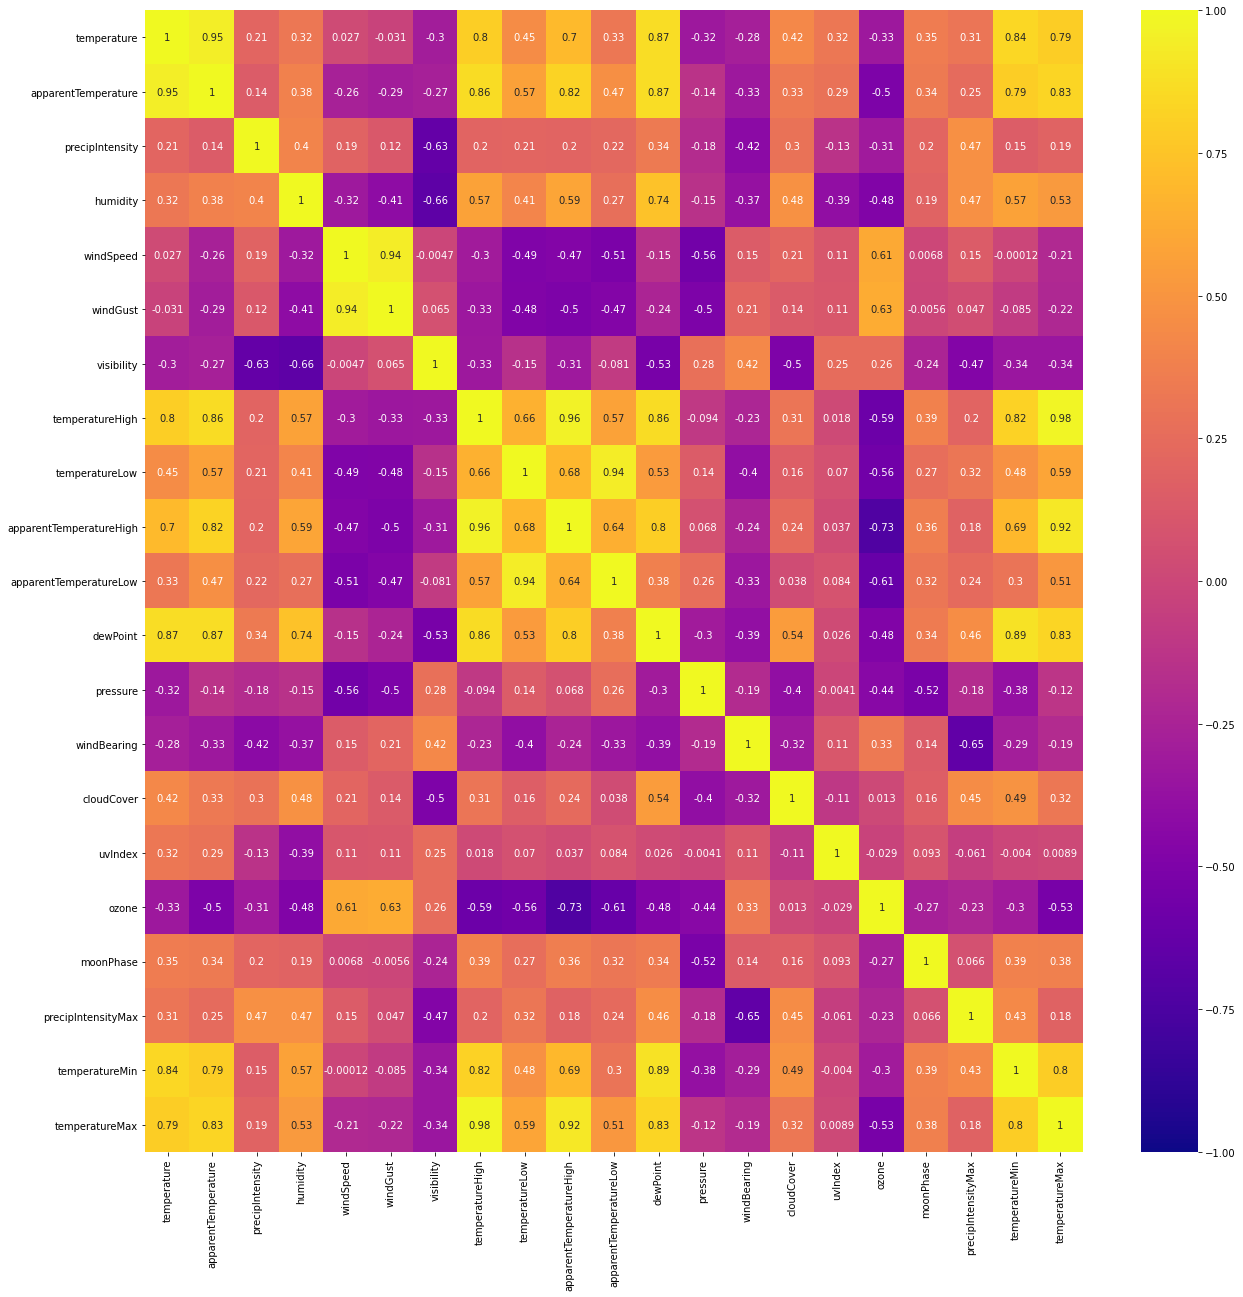

In [58]:
fig = plt.figure(figsize = (21,21))
sns.heatmap(data8.iloc[:,[i for i in range(5,27) if i != 8]].corr(), vmin = -1, vmax = 1, annot = True, cmap = "plasma")  #cmap = "BuPu"

In [59]:
data8.iloc[:,[i for i in range(4,15) if i != 8]].describe().drop(["count", "25%", "75%"], axis = 0)

,distance,temperature,apparentTemperature,precipIntensity,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow
mean,2.196046,39.117792,35.273965,0.00662,0.747553,6.355578,8.943117,8.307542,44.832485,33.675340
std,1.182877,7.494224,8.909465,0.01923,0.146973,3.434181,6.082697,2.733811,6.271329,6.506584
min,0.020000,18.910000,12.130000,0.00000,0.400000,1.030000,1.050000,0.717000,32.680000,19.630000
50%,2.170000,40.770000,35.840000,0.00000,0.750000,5.890000,7.000000,9.868000,44.660000,33.850000
max,7.860000,57.220000,57.220000,0.09230,0.960000,14.950000,27.250000,10.000000,57.870000,46.600000


In [60]:
data8.iloc[:,[i for i in range(15,27) if i != 8]].describe().drop(["count", "25%", "75%"], axis = 0)

,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax
mean,41.287883,29.669534,31.379033,1010.116287,226.996695,0.692835,0.479932,313.684934,0.576922,0.037257,33.267421,45.199957
std,8.164319,8.296897,10.084113,13.845676,99.680888,0.357133,0.583123,28.579168,0.242542,0.054970,6.430369,5.701718
min,22.620000,11.810000,6.460000,988.090000,13.000000,0.000000,0.000000,269.400000,0.210000,0.000000,17.850000,33.510000
50%,40.690000,29.880000,29.570000,1010.580000,261.000000,0.870000,0.000000,309.100000,0.680000,0.000700,34.220000,44.660000
max,57.200000,47.250000,49.270000,1035.550000,356.000000,1.000000,2.000000,378.700000,0.930000,0.143300,43.100000,57.870000


In [61]:
# Harmonic Mean of the  column in dataframe
hmean = stats.hmean(data8.iloc[:,[i for i in range(5,27) if i != 8]],axis=0)
hmean_df = pd.DataFrame(hmean.reshape(1,-1), columns = data8.iloc[:,[i for i in range(5,27) if i != 8]].columns)
hmean_df

,temperature,apparentTemperature,precipIntensity,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,...,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax
0,37.368114,32.211307,0.0,0.715583,4.394302,5.638035,6.265072,43.916762,32.265812,39.452079,...,26.027297,1009.926653,133.833548,0.0,0.0,311.14537,0.450799,0.0,31.694438,44.483716


In [62]:
kurtosis = pd.DataFrame(data8.iloc[:,[i for i in range(5,27) if i != 8]].kurtosis(), columns = ["kurtosis"])
skew = pd.DataFrame(data8.iloc[:,[i for i in range(5,27) if i != 8]].skew(), columns = ["skew"])
dist_st = pd.concat([kurtosis, skew], axis = 1)
dist_st

,kurtosis,skew
temperature,0.315705,-0.488725
apparentTemperature,0.553118,-0.341965
precipIntensity,8.814515,3.168272
humidity,-1.086370,-0.290235
windSpeed,-0.818541,0.464851
windGust,0.458243,1.084877
visibility,0.296981,-1.404406
temperatureHigh,-0.000579,-0.016623
temperatureLow,-0.502362,-0.272700
apparentTemperatureHigh,0.140702,-0.120984


Text(0.5, 1.0, 'windGust')

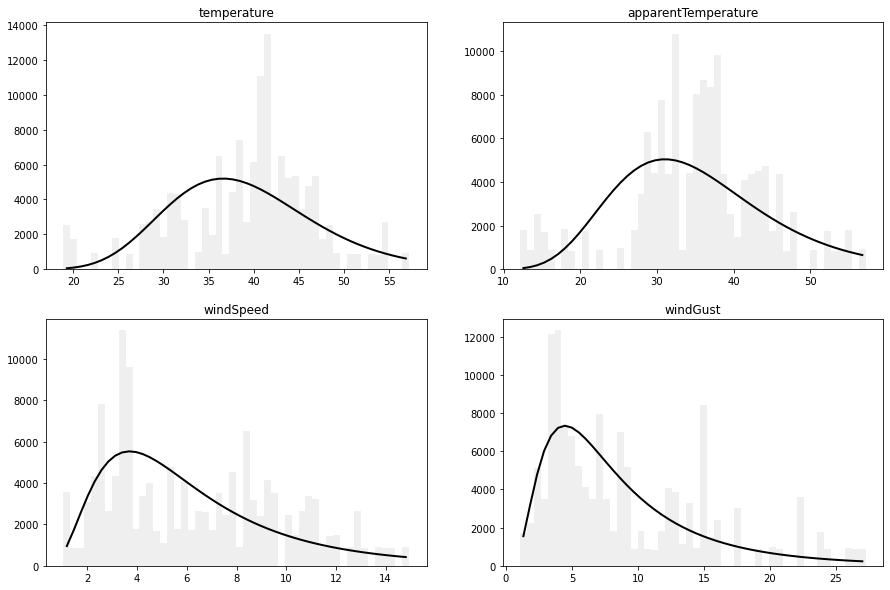

In [63]:
fig = plt.figure(figsize = (15,10))

#temperature
plt.subplot(2,2,1)

samples = data8.iloc[:,5]
shape, loc, scale= stats.lognorm.fit(samples, floc=0)
num_bins = 50
clr = "#EFEFEF"
counts,edges,patches = plt.hist(samples, bins = num_bins, color = clr)
centers = 0.5 * (edges[:-1] + edges[1:])
cdf = stats.lognorm.cdf(edges, shape, loc = loc, scale = scale)
prob = np.diff(cdf)
plt.plot(centers, samples.size * prob, 'k-', linewidth=2)
plt.title("temperature")


#apparentTemperature
plt.subplot(2,2,2)

samples = data8.iloc[:,6]
shape,loc,scale = stats.lognorm.fit(samples, floc = 0)
num_bins = 50
clr = "#EFEFEF"
counts,edges,patches = plt.hist(samples,bins = num_bins, color = clr)
centers = 0.5 * (edges[:-1] + edges[1:])
cdf = stats.lognorm.cdf(edges, shape,loc = loc, scale = scale)
prob = np.diff(cdf)
plt.plot(centers, samples.size * prob,'k-', linewidth = 2)
plt.title("apparentTemperature")


#windSpeed
plt.subplot(2,2,3)

samples = data8.iloc[:,10]
shape,loc,scale = stats.lognorm.fit(samples, floc = 0)
num_bins = 50
clr="#EFEFEF"
counts,edges,patches = plt.hist(samples,bins = num_bins, color = clr)
centers = 0.5 * (edges[:-1] + edges[1:])
cdf = stats.lognorm.cdf(edges,shape, loc = loc,scale = scale)
prob = np.diff(cdf)
plt.plot(centers, samples.size * prob, 'k-', linewidth = 2)
plt.title("windSpeed")


#windGust
plt.subplot(2,2,4)

samples = data8.iloc[:,11]
shape,loc,scale = stats.lognorm.fit(samples, floc = 0)
num_bins = 50
clr = "#EFEFEF"
counts,edges,patches = plt.hist(samples, bins = num_bins, color = clr)
centers = 0.5 * (edges[:-1] + edges[1:])
cdf = stats.lognorm.cdf(edges,shape,loc = loc, scale = scale)
prob = np.diff(cdf)
plt.plot(centers, samples.size * prob, 'k-', linewidth = 2)
plt.title("windGust")

In [64]:
f_oneway(data8["temperatureMean"], data8["distance"])

F_onewayResult(statistic=5405780.596481732, pvalue=0.0)

In [65]:
mod = ols('temperatureMean ~ distance', data = data8).fit()

# do type 2 anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA table')
print('----------------------')
print(aov_table)
print()

ANOVA table
----------------------
                sum_sq        df         F    PR(>F)
distance  3.811285e+01       1.0  1.152458  0.283037
Residual  4.492155e+06  135834.0       NaN       NaN



# Feature Selection

In [66]:
x = data8.iloc[:,[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,77,78]]
binary = data8.iloc[:,[-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15,-16,-17]]
y = data8.iloc[:,-1]

In [67]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_mm = mm.fit_transform(x)

In [68]:
x_mm_df = pd.DataFrame(x_mm, columns = x.columns)

In [69]:
data_mm = pd.concat([x_mm_df, binary, y], axis = 1)

### method1 (PFA)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features

    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]

        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA(n_components=self.q).fit(X)
        A_q = pca.components_.T

        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]

In [ ]:
pfa = PFA(n_features=15)
pfa.fit(x)

# To get the transformed matrix
x = pfa.features_

# To get the column indices of the kept features
column_indices = pfa.indices_

### method2 (HillClimbSearch)

In [ ]:
hc = HillClimbSearch(x, scoring_method = BicScore(x))
best_model = hc.estimate()
print(best_model.edges())

In [71]:
x.columns

Index(['distance', 'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax', 'temperatureMean', 'apparentTemperatureMean'],
      dtype='object')

### method3 (Eliminate low variance features)

In [ ]:
## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
Features_reduced = sel.fit_transform(x)

## Print the support and shape for the transformed features
print(sel.get_support())
print(Features_reduced.shape)

### method4 (NDFS)

In [ ]:
import scipy.io
from skfeature.function.sparse_learning_based import NDFS
from skfeature.utility import construct_W
from skfeature.utility.sparse_learning import feature_ranking
from skfeature.utility import unsupervised_evaluation


def main():

    # construct affinity matrix
    kwargs = {"metric": "euclidean", "neighborMode": "knn", "weightMode": "heatKernel", "k": 5, 't': 1}
    W = construct_W.construct_W(x, **kwargs)

    # obtain the feature weight matrix
    Weight = NDFS.ndfs(x, W = W, n_clusters=20)

    # sort the feature scores in an ascending order according to the feature scores
    idx = feature_ranking(Weight)

    # perform evaluation on clustering task
    num_fea = 20    # number of selected features
    num_cluster = 20    # number of clusters, it is usually set as the number of classes in the ground truth

    # obtain the dataset on the selected features
    selected_features = X[:, idx[0:num_fea]]

    # perform kmeans clustering based on the selected features and repeats 20 times
    nmi_total = 0
    acc_total = 0
    for i in range(0, 20):
        nmi, acc = unsupervised_evaluation.evaluation(X_selected = num_fea, n_clusters = num_cluster, y = y)
        nmi_total += nmi
        acc_total += acc

    # output the average NMI and average ACC
    print 'NMI:', float(nmi_total)/20
    print 'ACC:', float(acc_total)/20

### method5 (SPEC)

In [ ]:
import scipy.io
from skfeature.function.similarity_based import SPEC
from skfeature.utility import unsupervised_evaluation


def main():

    # specify the second ranking function which uses all except the 1st eigenvalue
    kwargs = {'style': 0}

    # obtain the scores of features
    score = SPEC.spec(x, **kwargs)

    # sort the feature scores in an descending order according to the feature scores
    idx = SPEC.feature_ranking(score, **kwargs)

    # perform evaluation on clustering task
    num_fea = 20    # number of selected features
    num_cluster = 20    # number of clusters, it is usually set as the number of classes in the ground truth

    # obtain the dataset on the selected features
    selected_features = x[:, idx[0:num_fea]]

    # perform kmeans clustering based on the selected features and repeats 20 times
    nmi_total = 0
    acc_total = 0
    for i in range(0, 20):
        nmi, acc = unsupervised_evaluation.evaluation(X_selected = num_fea, n_clusters = num_cluster, y = y)
        nmi_total += nmi
        acc_total += acc

    # output the average NMI and average ACC
    print 'NMI:', float(nmi_total)/20
    print 'ACC:', float(acc_total)/20

### method6 (Lap-Score)

In [ ]:
import scipy.io
from skfeature.function.similarity_based import lap_score
from skfeature.utility import construct_W
from skfeature.utility import unsupervised_evaluation


def main():

    # construct affinity matrix
    kwargs_W = {"metric": "euclidean", "neighbor_mode": "knn", "weight_mode": "heat_kernel", "k": 5, 't': 1}
    W = construct_W.construct_W(X, **kwargs_W)

    # obtain the scores of features
    score = lap_score.lap_score(x, W = W)

    # sort the feature scores in an ascending order according to the feature scores
    idx = lap_score.feature_ranking(score)

    # perform evaluation on clustering task
    num_fea = 20    # number of selected features
    num_cluster = 20    # number of clusters, it is usually set as the number of classes in the ground truth

    # obtain the dataset on the selected features
    selected_features = x[:, idx[0:num_fea]]

    # perform kmeans clustering based on the selected features and repeats 20 times
    nmi_total = 0
    acc_total = 0
    for i in range(0, 20):
        nmi, acc = unsupervised_evaluation.evaluation(X_selected = num_fea, n_clusters = num_cluster, y = y)
        nmi_total += nmi
        acc_total += acc

    # output the average NMI and average ACC
    print 'NMI:', float(nmi_total)/20
    print 'ACC:', float(acc_total)/20

# Basic Dynamic Pricing

In [ ]:
import autograd.numpy as np
from autograd import value_and_grad
from scipy.stats import gamma

def model(w,x):
    return np.dot(x[0].T,w)

def least_squares(w,x,y):    
    cost = np.sum((model(w,x) - y)**2)
    return cost

def gradient_descent(g,alpha,max_its,w,x,y):
    gradient = value_and_grad(g)

    weight_history = []      
    cost_history = []

    for k in range(1,max_its+1):
        cost_eval,grad_eval = gradient(w,x,y)
        
        weight_history.append(w)
        cost_history.append(cost_eval)

        w = w - alpha*grad_eval

    weight_history.append(w)
    cost_history.append(g(w,x,y))
    cost_history = np.asarray(cost_history)/x.shape[2]
    
    return weight_history,cost_history

def generate_sample(sample_size, gen_probs, weights):
    sample = np.random.rand(sample_size,len(gen_probs))
    for i in range(sample.shape[1]):
        sample[:,i] = [1 if x < gen_probs[i] else 0 for x in sample[:,i]]
    sample = np.vstack((np.ones((1,sample_size)),sample.T)).T
    value = []
    for i in range(sample_size):
        a = np.dot(weights,sample[i])
        val = gamma.ppf(np.random.uniform(),a,scale = 1/np.sqrt(a))
        value.append(np.round(val,2))
    return sample, value

def demand_curve(axis, value):
    demand = []
    sample_size = len(value)
    for price in axis:
        demand.append(sum(1 if x>=price else 0 for x in value)/sample_size)
    return demand

logistic_demand = lambda a,x0,x: 1/(1+np.exp(np.abs(a)*(x-x0)))

def APP_s(axis, value, c):
    app_s = []
    sample_size = len(value)
    demand = demand_curve(axis, value)
    for i in range(len(axis)):
        app_s.append(max(axis[i]-c,0)*demand[i])
    return app_s

def APP_d(w,x,y,c,d):
    est = d*model(w,x)
    ind = list(range(len(est)))
    rev = sum(max(est[i],c) if y[0][i] >= max(est[i],c) else 0 for i in ind)
    return rev/x.shape[2]

# DRL Algorithms

### Deep Deterministic Policy Gradients (DDPG)

In [ ]:
env = gym.make('ride-v0')

In [ ]:
n_actions = env.action_space.shape[-1]

In [ ]:
action_noise = OrnsteinUhlenbeckActionNoise(mean = np.zeros(n_actions), sigma = float(0.5) * np.ones(n_actions))

In [ ]:
agent = DDPG(MlpPolicy, env, verbose = 1, param_noise = None, action_noise = action_noise)

In [ ]:
agent.learn(total_timesteps = 50000)

In [ ]:
mean_reward, n_steps = evaluate_policy(agent, agent.get_env(), n_eval_episodes=10)

### Deep SARSA Network (DSN)

In [ ]:
# load the environment
env = gym.make('ride-v0')

In [ ]:
states = env.observation_space.shape[0]
actions = env.action_space.n

In [ ]:
# define agent
def agent(states, actions):
    
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dense(actions))
    model.add(Activation('linear'))
    return model

model = agent(states, actions)

In [ ]:
# Define the policy
policy = EpsGreedyQPolicy()

# Define SARSA agent by feeding it the policy and the model
sarsa = SARSAAgent(model = model, nb_actions = actions, nb_steps_warmup = 20, policy = policy)

# compile sarsa with mean squared error loss
sarsa.compile('adam', metrics=['mse'])

# train the agent for 50000 steps
sarsa.fit(env, nb_steps = 50000, visualize = False, verbose = 1)

In [ ]:
# Evaluate the agent on 200 new episodes.
scores = sarsa.test(env, nb_episodes = 200, visualize = False)